### <font color = blue> KNN Lab
### <font color =red> Requirements:</font>

a) Works on Classification or Regression Problems<br>
b) Can utilize Categorical or Numerical Predictors<br>
c) In case of Numerical predictors some form of Minkowski's distance is calculated
d) In case of categorical variables, Hamming or Jackard distance is calculated. A clever trick is employed to do that<br>
e) Python methods:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For Categorical predictors: KNeighborsClassifier   <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For Numerical predictors:  KNeighborsRegressor <br>
    
    

C:\Users\pgw6\Data 901 Fall 2019\allstate-claims-severity_Kaggle


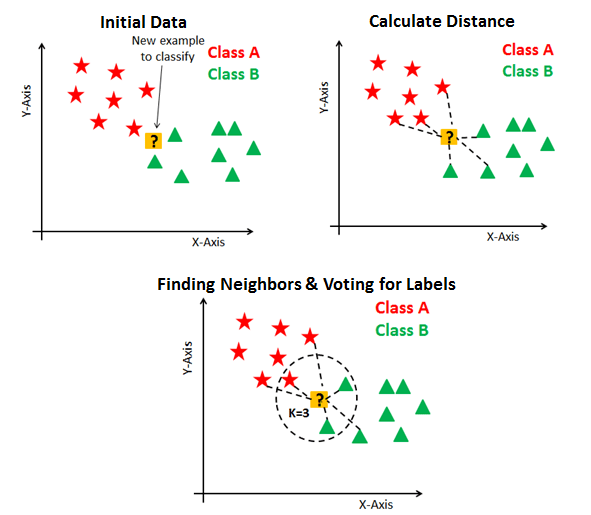

In [87]:
%cd "C:\\Users\\pgw6\\Data 901 Fall 2019\\allstate-claims-severity_Kaggle"
from IPython.display import Image
Image(filename='knn.png')

In [92]:
# https://scikit-learn.org/stable/modules/neighbors.html#neighbors

In [1]:
# KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
#            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
#            weights='uniform')

In [2]:
# # class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)
# # http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
    
# # algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, optional
# # weights : str or callable
# # weight function used in prediction. Possible values:
# # ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
# # ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
# # [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.
# # Uniform weights are used by default.

# Leaf_size : int, optional (default = 30)
# Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.
# p : integer, optional (default = 2)


In [79]:
# ------------------------
# Importing dependencies
# ------------------------
import seaborn as sns
from matplotlib import pyplot
import pandas as pd
import numpy as np
import time
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler  

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier  

from sklearn.metrics import accuracy_score

In [88]:
# ------------------------
# Reading the allstate csv file
# ------------------------

allstate = pd.read_csv("allstate_sample.csv")
allstate.shape
allstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Columns: 133 entries, Unnamed: 0 to loss
dtypes: float64(15), int64(2), object(116)
memory usage: 10.5+ MB


In [89]:
# ------------------------------------------------
# Creating versions of the categorical responses
# ------------------------------------------------

allstate["BinLoss1"] = pd.cut(allstate['loss'], [0,2000,100000], labels = ["Low", "High"])
allstate["CatLoss"] = pd.cut(allstate['loss'], [0,1100,2200, 3500, 100000], labels = ["Low", "Low-Medium", "Medium", "High"])
# allstate.head()



### <font color = red> At this stage only numerical variables will be used to make a classification model for BinLoss1

In [91]:
# -------------------------------------------------------------------------------
# The method _get_numeric_data() is an easy way of finding numeric columns
# -------------------------------------------------------------------------------
allstate._get_numeric_data().columns

# Notice that some columns need to be removed 

num_cols = list(allstate._get_numeric_data().columns)[2:-1]
# num_cols

In [92]:
# Converting to a feature space of numpy arrays
X = allstate.loc[:,num_cols]
y_cat = allstate["BinLoss1"]

In [97]:
# ------------------------------------
# Standardizing continuous columns
# ------------------------------------

scaler = StandardScaler()  
scaler.fit(X)

X_scaled = scaler.transform(X)  

# Examine the standaridizarion here:
X_scaled[:,3].max()

2.164739354194662

In [108]:
# ---------------------------------------------
# Running the first KNN classification model
# ---------------------------------------------

classifier = KNeighborsClassifier(n_neighbors=5, weights = 'uniform', algorithm = 'kd_tree')  
classifier.fit(X_scaled, y_cat)

y_pred = classifier.predict(X_scaled)  
print(pd.crosstab(y_pred, y_cat))
print("accuracy: {}".format(round(accuracy_score(y_pred, y_cat)*100)), "%")


BinLoss1   Low  High
row_0               
High      1676  3956
Low       3267  1458
accuracy: 70.0 %


### <font color = blue>The above may have used too many columns to reach such accuracy
Moreover, it is unknown if the accuracy can be improved with lower number of features alongside moving number of nearest neighbors

In [113]:
# defining a function that runs knn on two parameters: number of neighbors and power of Minkowski's distance
# Notice that it returns accuracy_score for each run

def knn(n,p):
    classifier = KNeighborsClassifier(n_neighbors=n, weights = 'uniform', algorithm = 'kd_tree', p = p)  
    classifier.fit(X_scaled, y_cat)

    y_pred = classifier.predict(X_scaled) 
#     print("print this")
    return accuracy_score(y_pred, y_cat)

In [114]:
# Sample run of the above function
knn(5,2)

0.6974027227961765

In [50]:
# --------------------------------------------------------------------------------------
# Using the above function with a random selection of smaller number of predictors
# --------------------------------------------------------------------------------------

# Since it is expected to take a long time to run, it is advisable to run some sort of counter to keep track of the progress
print(time.ctime())

# storing accuracy scores for each run
acc = []
# storing cmbination of columns randomly selected
cols = []
# storing the number of features for each run
numf = []
# storing the number of neighbors for each run
nn = []


# i denotes the number of features used
for i in range(3,15):
#     k denotes the number of times i features will be selected (50 in this case for each i)
    print("features = ", i,time.ctime())
    for k in range(0,50):
        for n in range(3,6):
            vars = random.sample(num_cols,i)
            X = allstate.loc[:,vars]
            y_cat = allstate["BinLoss1"]

            scaler = StandardScaler()  
            scaler.fit(X)

            X_scaled = scaler.transform(X)  

            acc.append(knn(n,2))
            cols.append((','.join(vars)))
            numf.append(i)
            nn.append(n)

print(time.ctime())


Thu Sep 12 11:31:28 2019
features =  3 Thu Sep 12 11:31:28 2019
features =  4 Thu Sep 12 11:32:11 2019
features =  5 Thu Sep 12 11:32:56 2019
features =  6 Thu Sep 12 11:33:43 2019
features =  7 Thu Sep 12 11:34:32 2019
features =  8 Thu Sep 12 11:35:31 2019
features =  9 Thu Sep 12 11:36:31 2019
features =  10 Thu Sep 12 11:37:42 2019
features =  11 Thu Sep 12 11:38:53 2019
features =  12 Thu Sep 12 11:40:10 2019
features =  13 Thu Sep 12 11:41:37 2019
features =  14 Thu Sep 12 11:43:13 2019
Thu Sep 12 11:44:55 2019


In [53]:
knndata= pd.DataFrame()
knndata["acc"] = acc
knndata["col_names"] = cols
knndata["num_features"] = numf
knndata["n_neighbors"] = nn
knndata.to_csv('knn2.csv')

In [115]:
knndata.shape


(1800, 4)

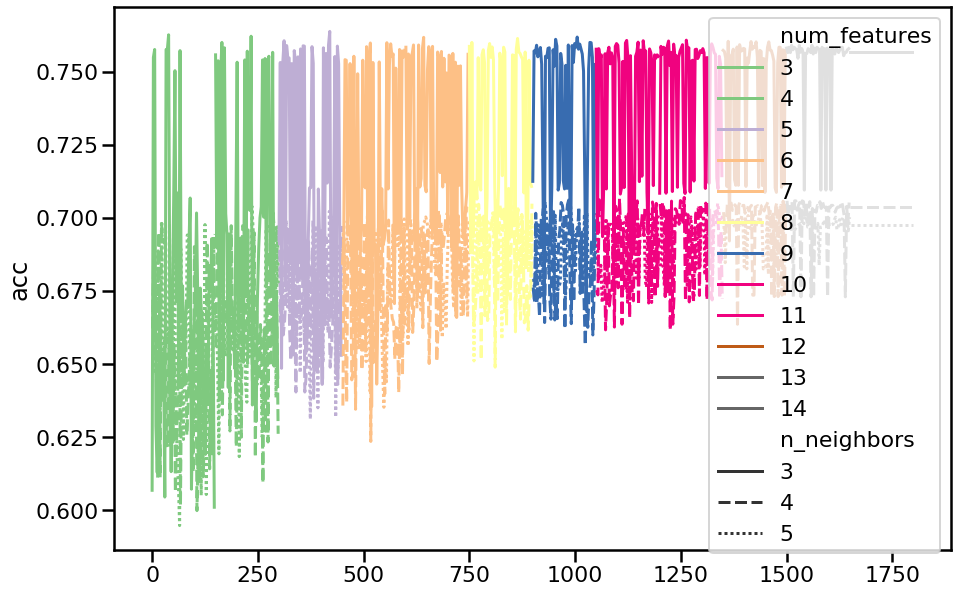

In [117]:
sns.set_context("poster")
a4_dims = (15, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.lineplot(x=knndata.index, y="acc",hue="num_features",style = 'n_neighbors' ,data=knndata,legend = 'full', palette="Accent")

### <font color = blue>  knn classification using categorical features
This requies special handling of the features by transforming them using one-hot-encoding<br>
Another important consideration is the distance metric to be used

In [51]:
# Creating the list of categorical features only
listofvars = list(allstate)
num_cols = set(allstate._get_numeric_data().columns)
listofcat = [value for value in listofvars if value not in num_cols] 

# The following is the final list of categorical variables to be used for KNN categorical, notice that all response variables are removed 
finallist  = [var for var in listofcat if var not in  listofcat[-4:]]

In [149]:
# ---------------------------------------------------------------------------
# KNN for categorical features after transforming them to one-hot-encoding
# ---------------------------------------------------------------------------

def knn(n):
    classifier = KNeighborsClassifier(n_neighbors=n,  algorithm = 'kd_tree', p = 1)  
    classifier.fit(X_scaled, y_cat)

    y_pred = classifier.predict(X_scaled)  
    print(pd.crosstab(y_pred, y_cat))
    print("accuracy: {}".format(accuracy_score(y_pred, y_cat)))

    
# Response Matrix (a sample of features for chosen for illustration purposes only)
vars = random.sample(finallist,7)
X = allstate.loc[:,vars]

# 1. Initiate the encoder
encode = preprocessing.OneHotEncoder()

# 2. Fit the encoder
encode.fit(X)

# 3. Transform to binary columns
onehotlabels = encode.transform(X).toarray()
onehotlabels.shape

X_scaled = onehotlabels


knn(5,2)

BinLoss1   Low  High
row_0               
High      3215  4088
Low       1728  1326
accuracy: 0.5615525731389398


In [153]:

for i in range(5,10):
    vars = random.sample(finallist,i)
    X = allstate.loc[:,vars]

    # 1. Initiate the encoder
    encode = preprocessing.OneHotEncoder()

    # 2. Fit the encoder
    encode.fit(X)

    # 3. Transform to binary columns
    onehotlabels = encode.transform(X).toarray()
    onehotlabels.shape

    X_scaled = onehotlabels

    print("Number of cat vars = ",i)
    print("list of cat vars = ", ','.join(X))
    knn(5,2)
    print("---------------")


Number of cat vars =  5
list of cat vars =  cat41,cat4,cat48,cat65,cat39
BinLoss1   Low  High
row_0               
High       228   467
Low       4715  4947
accuracy: 0.5003379356956648
---------------
Number of cat vars =  6
list of cat vars =  cat60,cat39,cat77,cat81,cat43,cat22
BinLoss1   Low  High
row_0               
High       468  1523
Low       4475  3891
accuracy: 0.5791252293135077
---------------
Number of cat vars =  7
list of cat vars =  cat83,cat65,cat78,cat20,cat116,cat94,cat113
BinLoss1   Low  High
row_0               
High      2070  3339
Low       2873  2075
accuracy: 0.5997875832770108
---------------
Number of cat vars =  8
list of cat vars =  cat45,cat44,cat113,cat18,cat79,cat20,cat30,cat80
BinLoss1   Low  High
row_0               
High      1420  3276
Low       3523  2138
accuracy: 0.6564642270927875
---------------
Number of cat vars =  9
list of cat vars =  cat15,cat81,cat6,cat56,cat55,cat32,cat52,cat69,cat97
BinLoss1   Low  High
row_0               
High      1

In [114]:
from sklearn.neighbors import NearestNeighbors

In [117]:
# converting to numpy array
X = allstate.loc[:,num_cols]
scaler = StandardScaler()  
scaler.fit(X)

X_scaled = scaler.transform(X)  

nbrs = NearestNeighbors(n_neighbors=2, algorithm='kd_tree').fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

In [139]:
type(distances)
df = pd.DataFrame(distances,columns = ['a','b'])
min(df["b"])

0.0

In [ ]:
# Running a regression model 

# Converting to a feature space of numpy arrays
X = allstate.loc[:,num_cols]
y_cont = allstate["loss"]
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_scaled, y_cont) 
# print(neigh.predict([X_test]))

predictions =neigh.predict(X_scaled)

df = pd.DataFrame()
df["pred"] =predictions
df["actual"] =y_cont
df["diff"] = predictions - y_cont

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.scatterplot(x="actual", y="diff", data=df)